In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

sns.set(style="whitegrid", context="notebook")

# Upload Titanic-Dataset.csv in Colab (left sidebar → Files → Upload) first
df = pd.read_csv("Titanic-Dataset.csv")  # exact name from your upload
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/tmp/ipython-input-1525438574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='Set1')


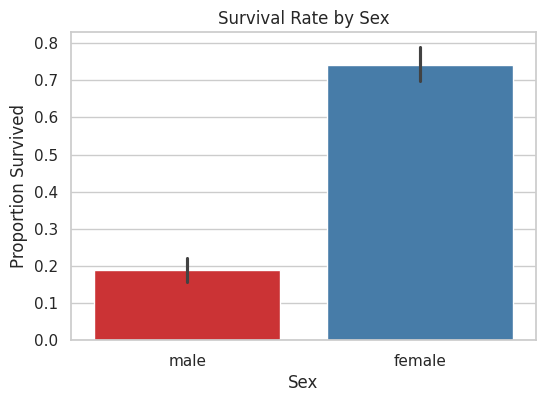

In [6]:
# Create a bar plot of survival rate by Sex
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, palette='Set1')
plt.title('Survival Rate by Sex')
plt.ylabel('Proportion Survived')
plt.show()

/tmp/ipython-input-1225763684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='Set2')


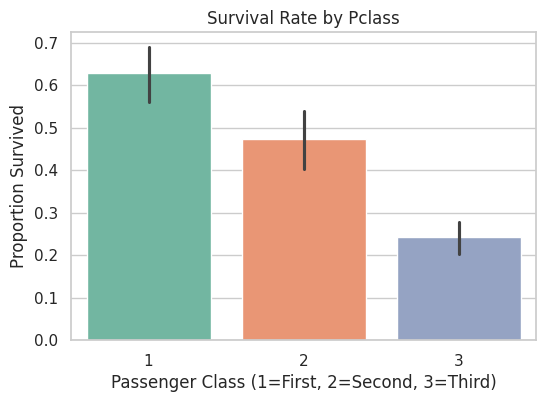

In [7]:
# Create a bar plot of survival rate by Pclass
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Pclass')
plt.xlabel('Passenger Class (1=First, 2=Second, 3=Third)')
plt.ylabel('Proportion Survived')
plt.show()

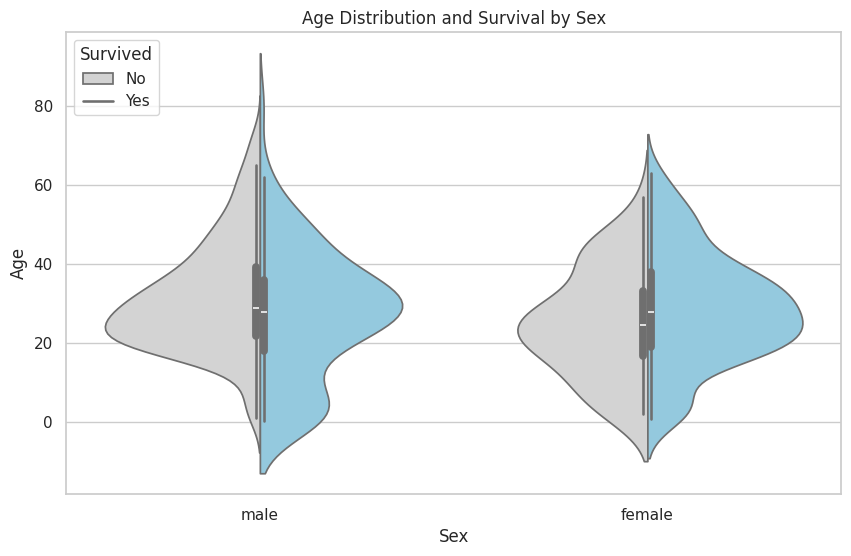

In [8]:
# Create a violin plot of Age distribution separated by Survival status and Sex
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: "lightgray", 1: "skyblue"})
plt.title('Age Distribution and Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper left', labels=['No', 'Yes'])
plt.show()

In [9]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
data = df.copy()

# Fill Age with median
data["Age"] = data["Age"].fillna(data["Age"].median())

# Fill Embarked with mode
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

# Drop Cabin (too many missing) and PassengerId, Name, Ticket (not needed for model)
data = data.drop(columns=["Cabin", "PassengerId", "Name", "Ticket"])

In [11]:
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1

In [12]:
# One-hot encode Sex and Embarked
data_encoded = pd.get_dummies(
    data,
    columns=["Sex", "Embarked"],
    drop_first=True  # avoids dummy variable trap
)

data_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,True,False,True
1,1,1,38.0,1,0,71.2833,2,False,False,False
2,1,3,26.0,0,0,7.9250,1,False,False,True
3,1,1,35.0,1,0,53.1000,2,False,False,True
4,0,3,35.0,0,0,8.0500,1,True,False,True


In [13]:
X = data_encoded.drop("Survived", axis=1)
y = data_encoded["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



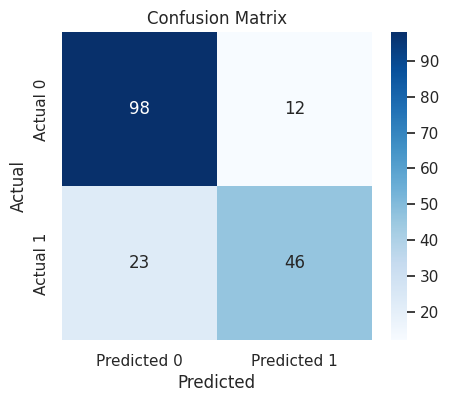

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"]
)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()